<a href="https://colab.research.google.com/github/akashverma55/HousePricePrediction/blob/main/HOUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.5 MB/s eta 0:00:00


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge

In [ ]:
pip install lightgbm

In [ ]:
pip install --upgrade lightgbm

In [ ]:
pip show lightgbm

In [ ]:
import lightgbm as lgb

print(lgb.__version__)


In [ ]:
train_df=pd.read_csv('/content/train.csv')
test_df=pd.read_csv('/content/test.csv')

In [ ]:
train_df.columns.tolist()

In [ ]:
train_df.describe()

In [ ]:
train_df.dtypes[train_df.dtypes!='object']

In [ ]:
train_df.shape

In [ ]:
plt.scatter(y='SalePrice', x='MSSubClass', data=train_df)
plt.plot()

In [ ]:
plt.scatter(x='LotFrontage', y='SalePrice', data=train_df)

In [ ]:
train_df.query('LotFrontage>300')
# drop 934, 1299

In [ ]:
plt.scatter(x='LotArea', y='SalePrice', data=train_df)

In [ ]:
train_df.query('LotArea > 55000')
# drop 250,314,336,707,1299,
# maybe 1397

In [ ]:
stats.zscore(train_df['LotArea']).sort_values().tail(10)

In [ ]:
plt.scatter(x='OverallQual', y='SalePrice', data=train_df)

In [ ]:
train_df.query('OverallQual ==10')
# maybe 524

In [ ]:
plt.scatter(x='OverallCond', y='SalePrice', data=train_df)

In [ ]:
train_df.query('OverallCond==2')
# drop 379

In [ ]:
train_df.query('OverallCond==5 & SalePrice>700000')
# drop 1183

In [ ]:
train_df.query('OverallCond==6 & SalePrice>700000')
# drop 692

In [ ]:
plt.scatter(x='YearBuilt', y='SalePrice', data=train_df)

In [ ]:
train_df.query('YearBuilt < 1900 & SalePrice>300000')
# drop 185
# maybe 583

In [ ]:
train_df.query('YearBuilt > 1900 & SalePrice>700000')

In [ ]:
plt.scatter(x='YearRemodAdd', y='SalePrice', data=train_df)

In [ ]:
train_df.query('YearRemodAdd < 1970 & SalePrice>300000')
# drop 314

In [ ]:
plt.scatter(x='MasVnrArea', y='SalePrice', data=train_df)

In [ ]:
train_df.query('MasVnrArea>1500')
# drop 298

In [ ]:
plt.scatter(x='BsmtFinSF1', y='SalePrice', data=train_df)

In [ ]:
train_df.query('BsmtFinSF1>5000')
# 1299

In [ ]:
plt.scatter(x='BsmtFinSF2', y='SalePrice', data=train_df)

In [ ]:
train_df.query('BsmtFinSF2>400 & SalePrice>500000')
# 441

In [ ]:
plt.scatter(x='BsmtUnfSF', y='SalePrice', data=train_df)

In [ ]:
plt.scatter(x='TotalBsmtSF', y='SalePrice', data=train_df)

In [ ]:
train_df.query('TotalBsmtSF>5500')
# drop 1299

In [ ]:
plt.scatter(x='1stFlrSF', y='SalePrice', data=train_df)

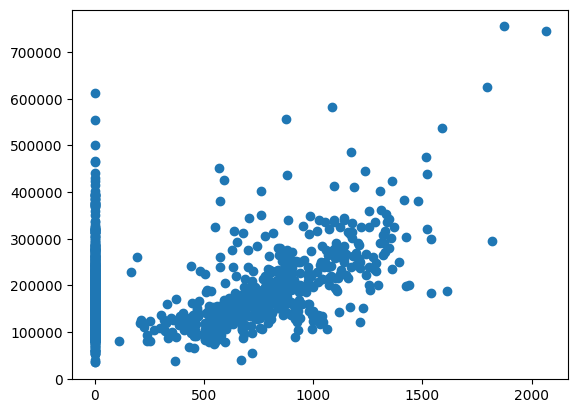

In [ ]:
plt.scatter(x='2ndFlrSF', y='SalePrice', data=train_df)

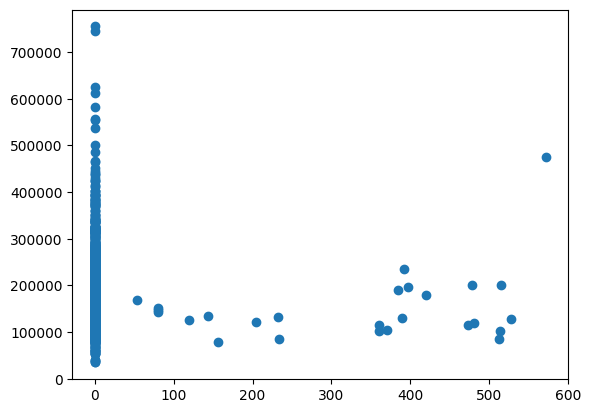

In [ ]:
plt.scatter(x='LowQualFinSF', y='SalePrice', data=train_df)


In [ ]:
train_df.query('LowQualFinSF>550')
# drop 186

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


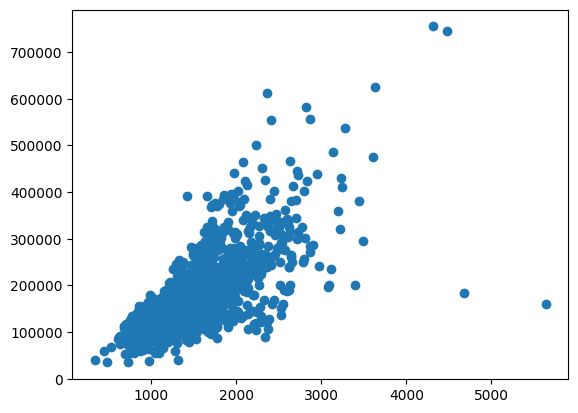

In [ ]:
plt.scatter(x='GrLivArea', y='SalePrice', data=train_df)

In [ ]:
train_df.query('GrLivArea>4500')
# 524,1299

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


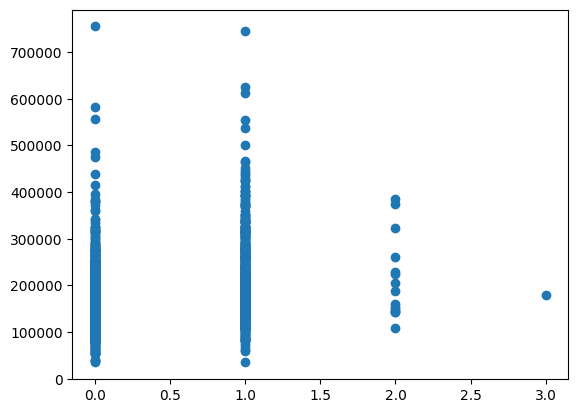

In [ ]:
plt.scatter(x='BsmtFullBath', y='SalePrice', data=train_df)

In [ ]:
train_df.query('BsmtFullBath==3')
# 739

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
738,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000


In [ ]:
plt.scatter(x='BsmtHalfBath', y='SalePrice', data=train_df)

In [ ]:
train_df.query('BsmtHalfBath==2')
# drop 598, 955

In [ ]:
plt.scatter(x='FullBath', y='SalePrice', data=train_df)

In [ ]:
plt.scatter(x='HalfBath', y='SalePrice', data=train_df)

In [ ]:
plt.scatter(x='BedroomAbvGr', y='SalePrice', data=train_df)

In [ ]:
train_df.query('BedroomAbvGr==8')
# drop 636

In [ ]:
plt.scatter(x='KitchenAbvGr', y='SalePrice', data=train_df)

In [ ]:
train_df.query('KitchenAbvGr==3')
# drop 49, 810

In [ ]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data=train_df)

In [ ]:
train_df.query('TotRmsAbvGrd==14')
# 636

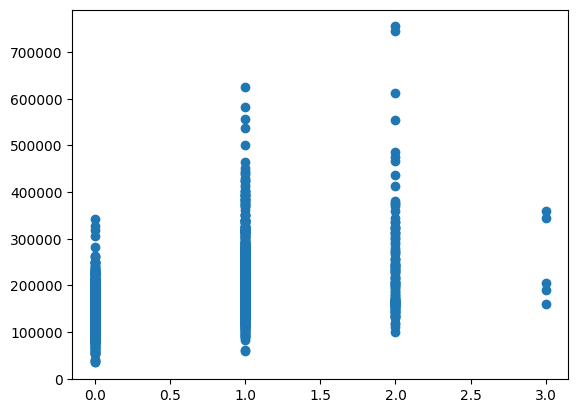

In [ ]:
plt.scatter(x='Fireplaces', y='SalePrice', data=train_df)

In [ ]:
train_df.query('Fireplaces==3')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
166,167,20,RL,NaN,10708,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,11,2009,COD,Normal,190000
309,310,20,RL,90.0,12378,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,360000
605,606,60,RL,85.0,13600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,205000
642,643,80,RL,75.0,13860,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2009,WD,Normal,345000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


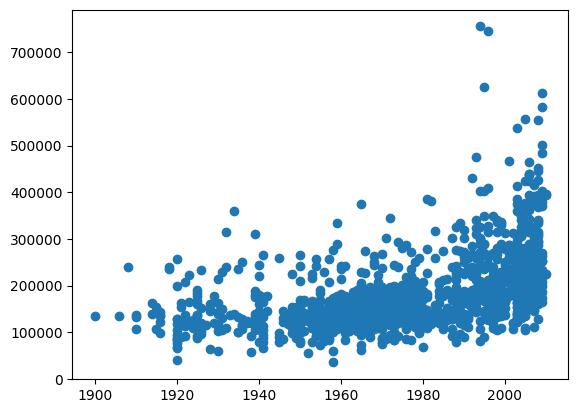

In [ ]:
plt.scatter(x='GarageYrBlt', y='SalePrice', data=train_df)

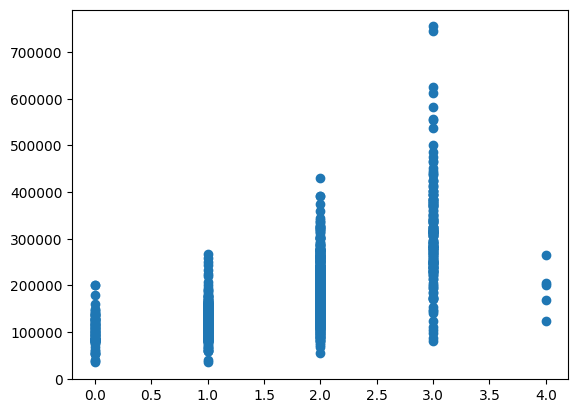

In [ ]:
plt.scatter(x='GarageCars', y='SalePrice', data=train_df)

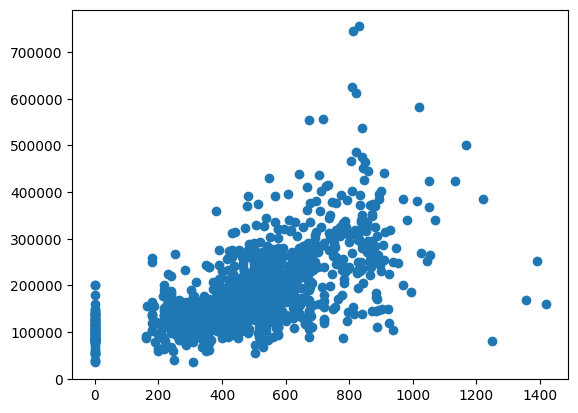

In [ ]:
plt.scatter(x='GarageArea', y='SalePrice', data=train_df)

In [ ]:
train_df.query('GarageArea>1200')
# 1062,1191

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
581,582,20,RL,98.0,12704,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,New,Partial,253293
825,826,20,RL,114.0,14803,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,New,Partial,385000
1061,1062,30,C (all),120.0,18000,Grvl,NaN,Reg,Low,AllPub,...,0,NaN,NaN,Shed,560,8,2008,ConLD,Normal,81000
1190,1191,190,RL,NaN,32463,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Normal,168000
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


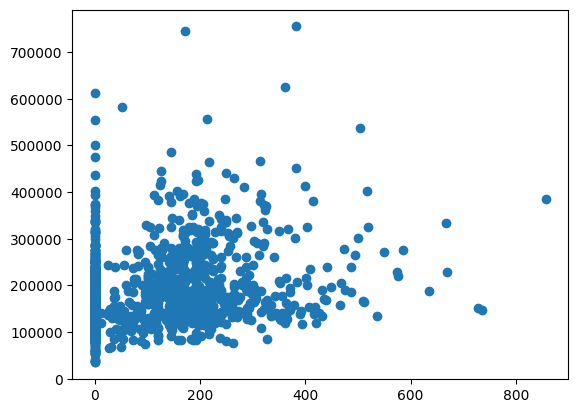

In [ ]:
plt.scatter(x='WoodDeckSF', y='SalePrice', data=train_df)

In [ ]:
values = [598,955,935,1299,250,314,336,707,379,1183,692,186,441,186,441,186,524,739,598,955,636,1062,1191,496,198]

In [ ]:
train_df=train_df[train_df.Id.isin(values)==False]

In [ ]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1436
MiscFeature,1389
Alley,1350
Fence,1163
MasVnrType,862
FireplaceQu,685
LotFrontage,255
GarageYrBlt,77
GarageCond,77
GarageType,77


In [ ]:
train_df['MiscFeature'].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [ ]:
train_df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [ ]:
train_df['Alley'].fillna('No', inplace= True)
test_df['Alley'].fillna('No', inplace= True)

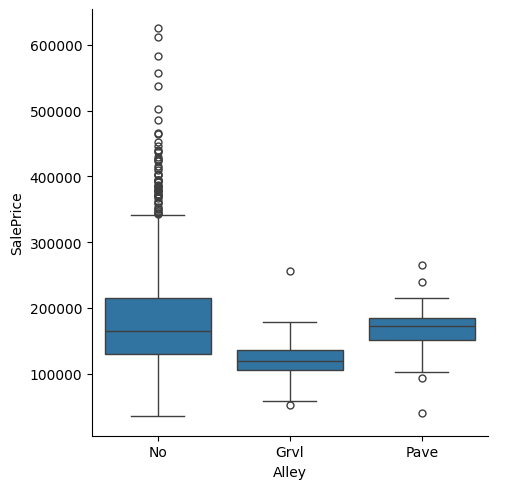

In [ ]:
sn.catplot(data=train_df, x='Alley',y='SalePrice', kind='box')

In [ ]:
grvl_count = train_df.query('Alley=="Pave"').count()
print(grvl_count)

Id               40
MSSubClass       40
MSZoning         40
LotFrontage      38
LotArea          40
                 ..
MoSold           40
YrSold           40
SaleType         40
SaleCondition    40
SalePrice        40
Length: 81, dtype: int64


In [ ]:
train_df['Fence'].unique()

array([nan, 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [ ]:
train_df['Fence'].fillna('No',inplace=True)
test_df['Fence'].fillna('No',inplace=True)

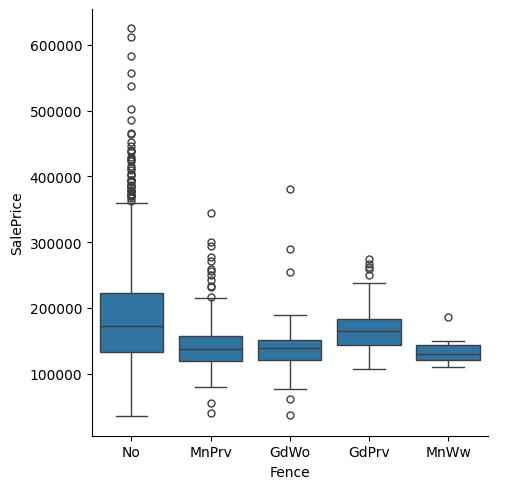

In [ ]:
sn.catplot(data=train_df, x='Fence',y='SalePrice', kind='box')

In [ ]:
train_df['MasVnrType'].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [ ]:
train_df['MasVnrType'].fillna('No',inplace=True)
test_df['MasVnrType'].fillna('No',inplace=True)

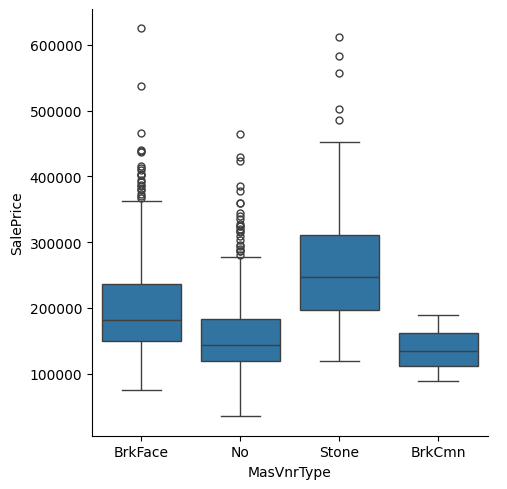

In [ ]:
sn.catplot(data=train_df, x='MasVnrType',y='SalePrice', kind='box')

In [ ]:
train_df['MasVnrArea'].fillna(0,inplace=True)
test_df['MasVnrArea'].fillna(0,inplace=True)

In [ ]:
train_df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
train_df['FireplaceQu'].fillna('No',inplace=True)
test_df['FireplaceQu'].fillna('No',inplace=True)

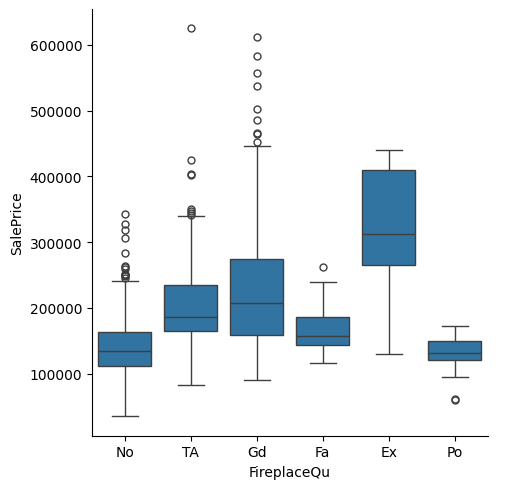

In [ ]:
sn.catplot(data=train_df, x='FireplaceQu',y='SalePrice', kind='box')

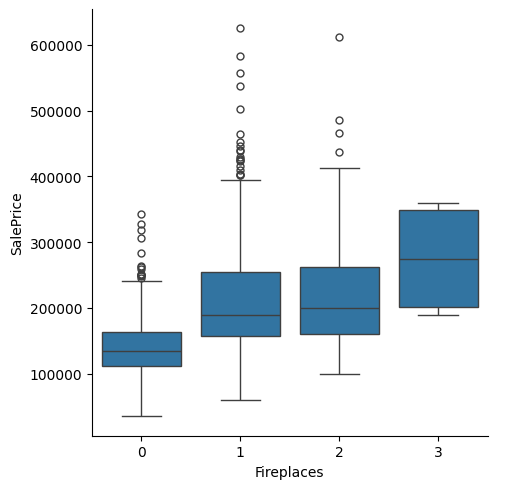

In [ ]:
sn.catplot(data=train_df, x='Fireplaces',y='SalePrice', kind='box')

In [ ]:
train_df['LotFrontage'].fillna(0,inplace=True)
test_df['LotFrontage'].fillna(0,inplace=True)

In [ ]:
train_df['GarageYrBlt'].corr(train_df['YearBuilt'])

0.8289827595060575

In [ ]:
train_df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [ ]:
train_df['GarageCond'].fillna("No",inplace=True)
test_df['GarageCond'].fillna('No',inplace=True)

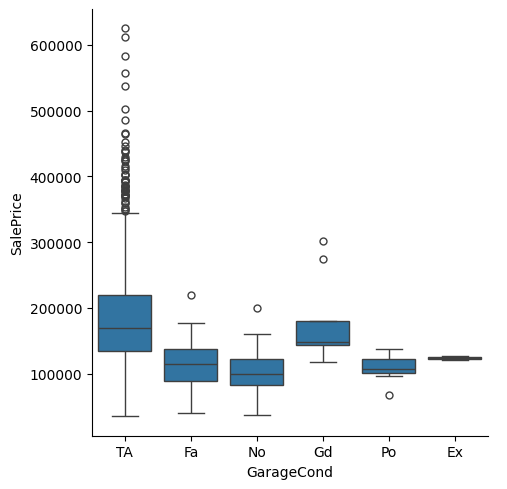

In [ ]:
sn.catplot(data=train_df, x='GarageCond',y='SalePrice', kind='box')

In [ ]:
train_df['GarageType'].fillna("No",inplace=True)
test_df['GarageType'].fillna('No',inplace=True)

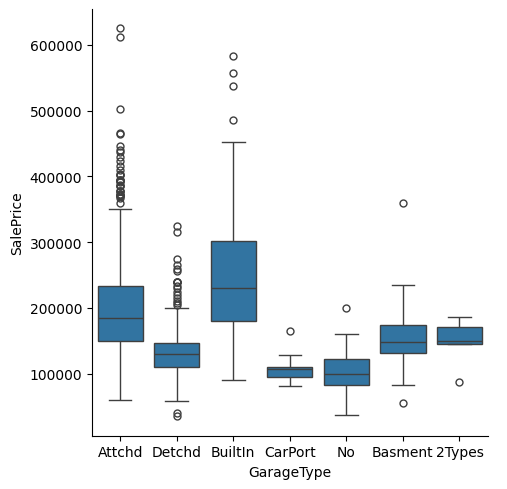

In [ ]:
sn.catplot(data=train_df, x='GarageType',y='SalePrice', kind='box')

In [ ]:
train_df['GarageFinish'].fillna("No",inplace=True)
test_df['GarageFinish'].fillna('No',inplace=True)

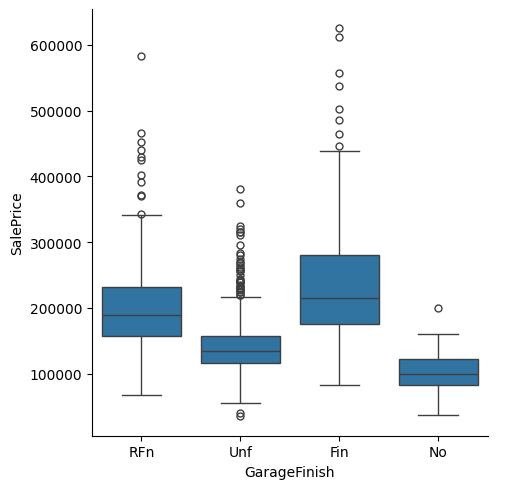

In [ ]:
sn.catplot(data=train_df, x='GarageFinish',y='SalePrice', kind='box')

In [ ]:
train_df['GarageQual'].fillna("No",inplace=True)
test_df['GarageQual'].fillna('No',inplace=True)

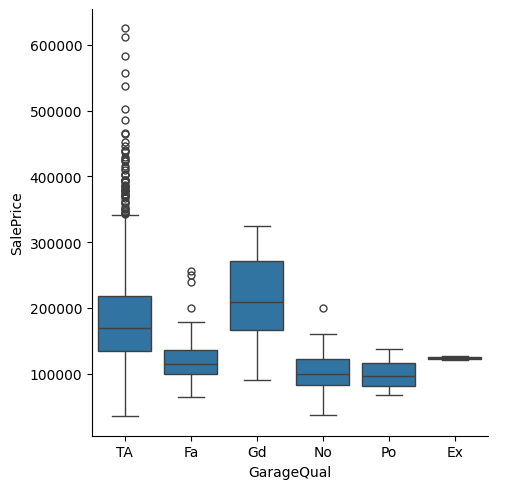

In [ ]:
sn.catplot(data=train_df, x='GarageQual',y='SalePrice', kind='box')

In [ ]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [ ]:
train_df['BsmtFinType1'].fillna("Unf",inplace=True)
test_df['BsmtFinType1'].fillna('Unf',inplace=True)

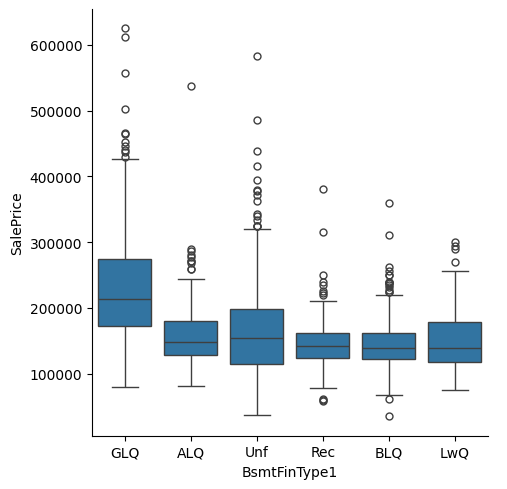

In [ ]:
sn.catplot(data=train_df, x='BsmtFinType1',y='SalePrice', kind='box')

In [ ]:
train_df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [ ]:
train_df['BsmtFinType2'].fillna("Unf",inplace=True)
test_df['BsmtFinType2'].fillna('Unf',inplace=True)

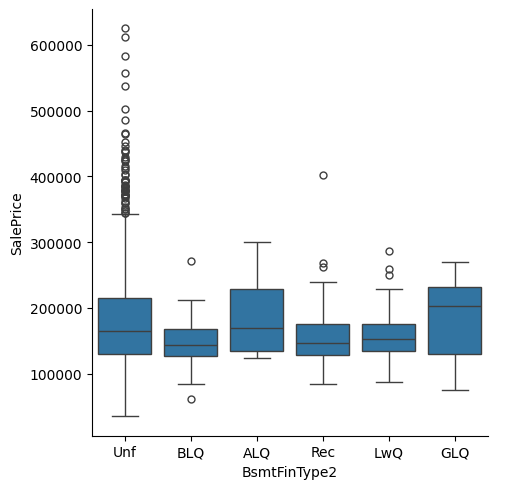

In [ ]:
sn.catplot(data=train_df, x='BsmtFinType2',y='SalePrice', kind='box')

In [ ]:
train_df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [ ]:
train_df['BsmtExposure'].fillna("No",inplace=True)
test_df['BsmtExposure'].fillna('No',inplace=True)

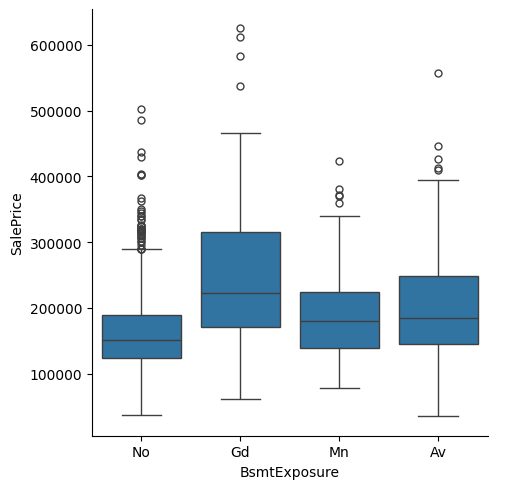

In [ ]:
sn.catplot(data=train_df, x='BsmtExposure',y='SalePrice', kind='box')

In [ ]:
train_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [ ]:
train_df['BsmtQual'].fillna("No",inplace=True)
test_df['BsmtQual'].fillna('No',inplace=True)

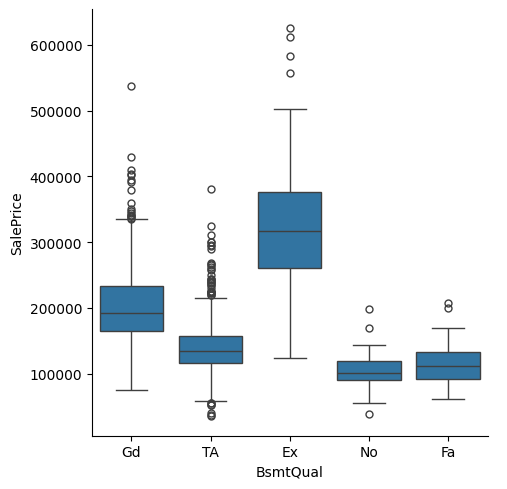

In [ ]:
sn.catplot(data=train_df, x='BsmtQual',y='SalePrice', kind='box')

In [ ]:
train_df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [ ]:
train_df['BsmtCond'].fillna("No",inplace=True)
test_df['BsmtCond'].fillna('No',inplace=True)

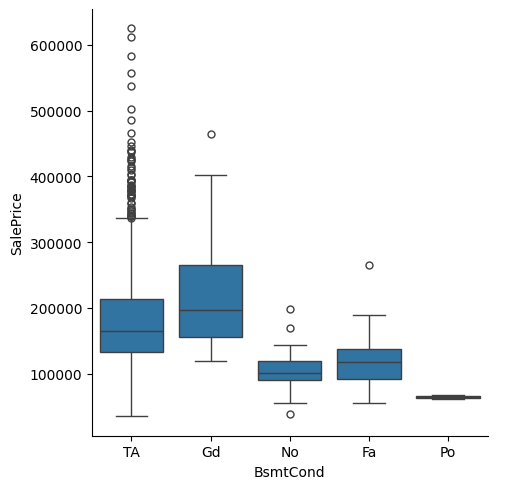

In [ ]:
sn.catplot(data=train_df, x='BsmtCond',y='SalePrice', kind='box')

In [ ]:
train_df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object)

In [ ]:
train_df['BsmtFinType1'].fillna("Unf",inplace=True)
test_df['BsmtFinType1'].fillna('Unf',inplace=True)

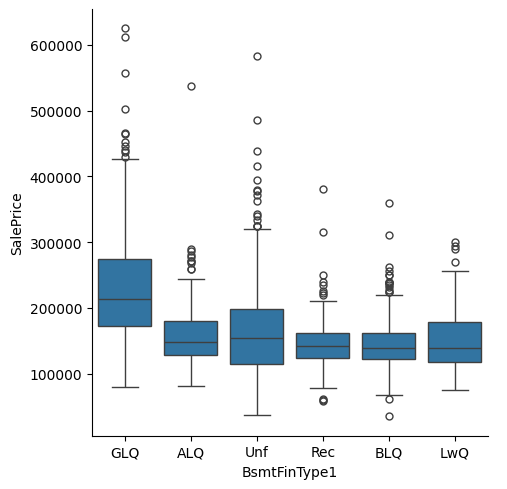

In [ ]:
sn.catplot(data=train_df, x='BsmtFinType1',y='SalePrice', kind='box')

In [ ]:
train_df['MasVnrArea'].fillna(0,inplace=True)
test_df['MasVnrArea'].fillna(0,inplace=True)

In [ ]:
train_df['Electrical'].fillna('SBrkr',inplace=True)
test_df['Electrical'].fillna('SBrkr',inplace=True)

In [ ]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)

,0
PoolQC,1436
MiscFeature,1389
GarageYrBlt,77
BedroomAbvGr,0
GarageType,0
FireplaceQu,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0


In [ ]:
train_df=train_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt','GarageCond','BsmtFinType2'])
test_df=test_df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','GarageYrBlt','GarageCond','BsmtFinType2'])

In [ ]:
# Feature Engineering
train_df['HouseAge']=train_df['YrSold']-train_df['YearBuilt']
test_df['HouseAge']=test_df['YrSold']-test_df['YearBuilt']

train_df['HouseRemodelAge']=train_df['YrSold']-train_df['YearRemodAdd']
test_df['HouseRemodelAge']=test_df['YrSold']-test_df['YearRemodAdd']

train_df['Totalsf']=train_df['1stFlrSF']+train_df['2ndFlrSF']+train_df['BsmtFinSF1']+train_df['BsmtFinSF2']
test_df['Totalsf']=test_df['1stFlrSF']+test_df['2ndFlrSF']+test_df['BsmtFinSF1']+test_df['BsmtFinSF2']

train_df['TotalArea']=train_df['GrLivArea']+train_df['TotalBsmtSF']
test_df['TotalArea']=test_df['GrLivArea']+test_df['TotalBsmtSF']

train_df['TotalBath'] = train_df['BsmtFullBath'] + train_df['FullBath'] + 0.5 * train_df['BsmtHalfBath'] + 0.5 * train_df['HalfBath']
test_df['TotalBath'] = test_df['BsmtFullBath'] + test_df['FullBath'] + 0.5 * test_df['BsmtHalfBath'] + 0.5 * test_df['HalfBath']

train_df['TotalPorchSF']=train_df['OpenPorchSF']+train_df['3SsnPorch']+train_df['EnclosedPorch']+train_df['ScreenPorch']
test_df['TotalPorchSF']=test_df['OpenPorchSF']+test_df['3SsnPorch']+test_df['EnclosedPorch']+test_df['ScreenPorch']

In [ ]:
train_df=train_df.drop(columns=['Id','YrSold','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','YearBuilt',
                                'WoodDeckSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch'])
test_df=test_df.drop(columns=['YrSold','YearRemodAdd','1stFlrSF','2ndFlrSF','BsmtFinSF1','BsmtFinSF2','GrLivArea','TotalBsmtSF','YearBuilt',
                                'WoodDeckSF','BsmtFullBath','FullBath','BsmtHalfBath','HalfBath','OpenPorchSF','3SsnPorch','EnclosedPorch','ScreenPorch'])

<Axes: >

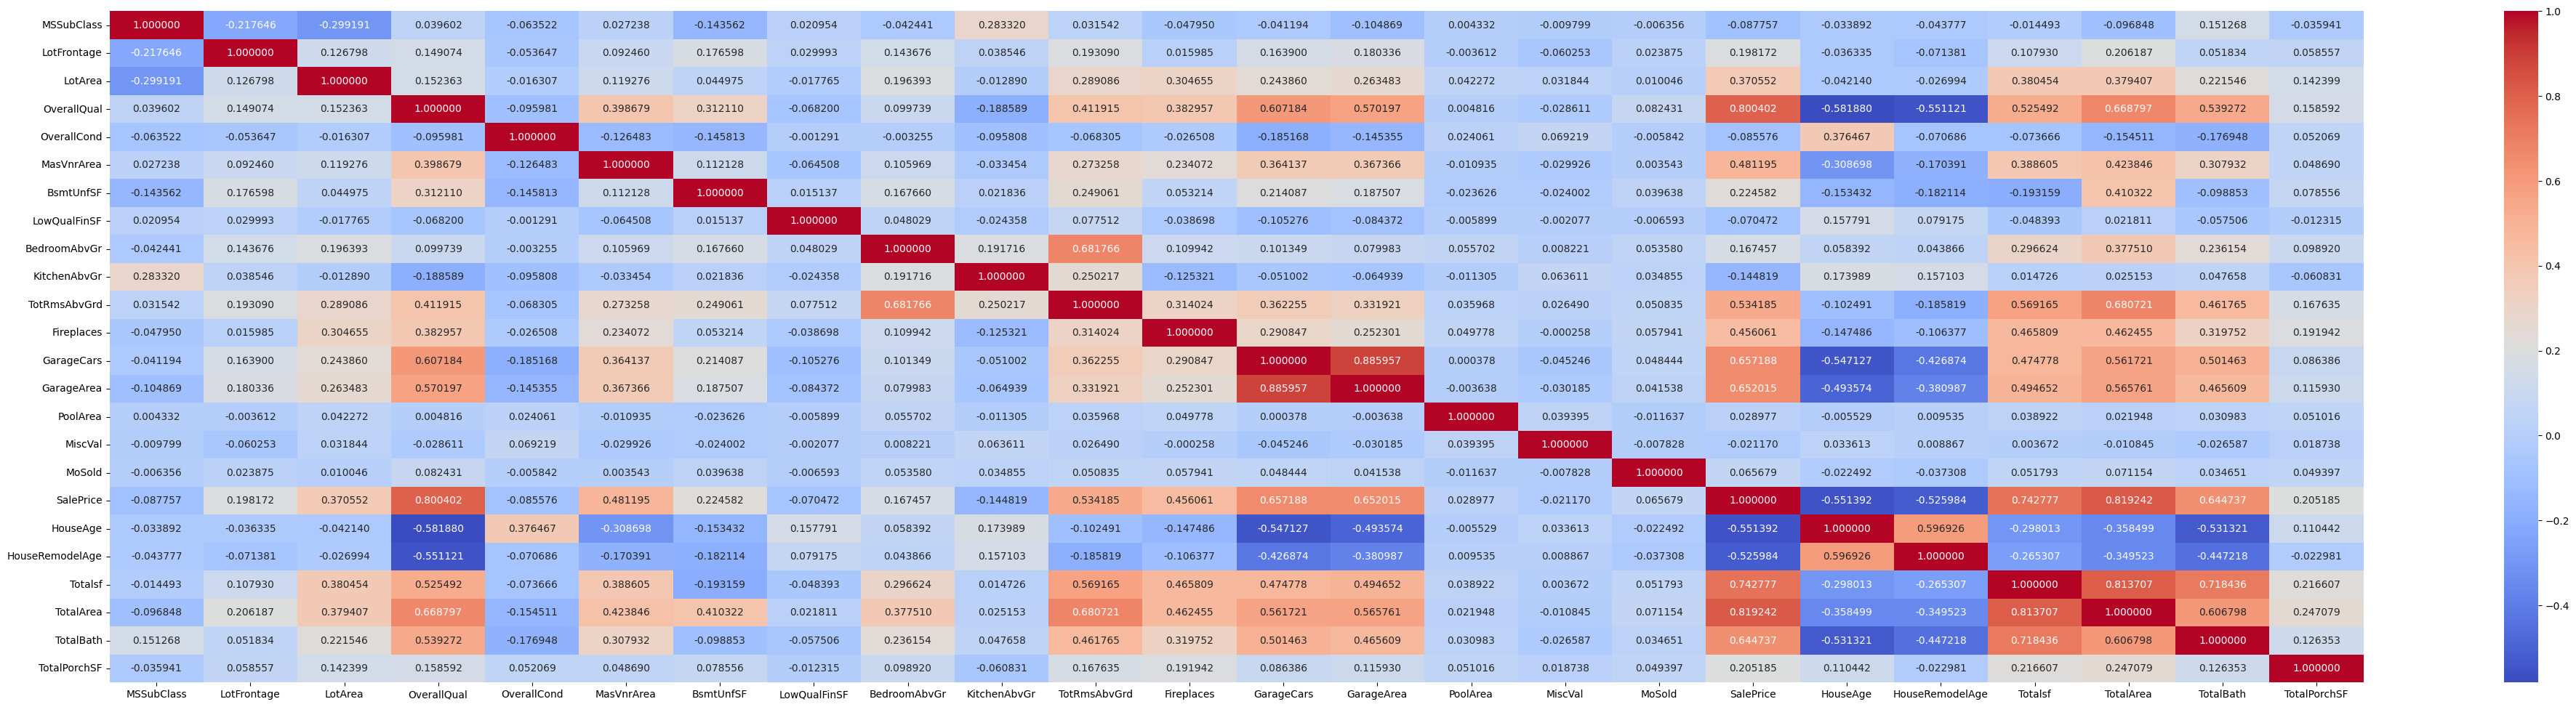

In [ ]:
correlation_matrix=train_df.corr(numeric_only=True)
plt.figure(figsize=(50,12))
sn.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='2f')

In [ ]:
train_df=train_df.drop(columns=['GarageArea'])
test_df=test_df.drop(columns=['GarageArea'])

<Axes: xlabel='SalePrice', ylabel='Count'>

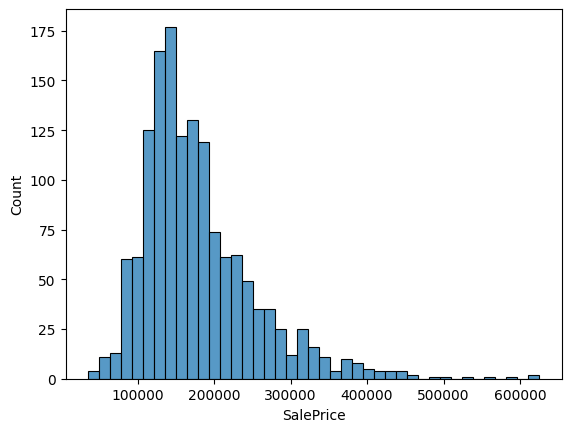

In [ ]:
sn.histplot(
  train_df,
  x=train_df['SalePrice']
)

In [ ]:
train_df['SalePrice']=np.log1p(train_df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Count'>

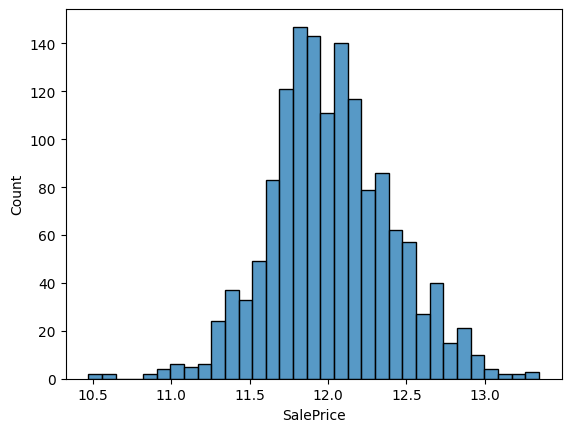

In [ ]:
sn.histplot(
  train_df,
  x=train_df['SalePrice']
)

In [ ]:
train_df.dtypes[train_df.dtypes=='object']

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [ ]:
train_df.dtypes[train_df.dtypes!='object']

MSSubClass           int64
LotFrontage        float64
LotArea              int64
OverallQual          int64
OverallCond          int64
MasVnrArea         float64
BsmtUnfSF            int64
LowQualFinSF         int64
BedroomAbvGr         int64
KitchenAbvGr         int64
TotRmsAbvGrd         int64
Fireplaces           int64
GarageCars           int64
PoolArea             int64
MiscVal              int64
MoSold               int64
SalePrice          float64
HouseAge             int64
HouseRemodelAge      int64
Totalsf              int64
TotalArea            int64
TotalBath          float64
TotalPorchSF         int64
dtype: object

In [ ]:
# they are the columns where data are in ordered(low,moderate,high).
ode_cols=['LotShape','LandContour','Utilities','LandSlope','BsmtQual','BsmtFinType1','CentralAir','Functional',
          'FireplaceQu','GarageFinish','GarageQual','ExterQual','BsmtCond','PavedDrive','ExterCond','KitchenQual','BsmtExposure','HeatingQC']

In [ ]:
# this are the columns where data are in unordered(like places,name).
ohe_cols=['Street','LotConfig','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd',
         'MasVnrType','Foundation','Electrical','SaleType','MSZoning','SaleCondition','Heating','GarageType','RoofMatl']

In [ ]:
num_cols=train_df.select_dtypes(include=['int64','float64']).columns
num_cols=num_cols.drop('SalePrice')

In [ ]:
num_pipeline=Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [ ]:
ode_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ode',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=-1))
])

In [ ]:
ohe_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [ ]:
col_trans=ColumnTransformer(transformers=[
    ('num_p',num_pipeline,num_cols),
    ('ode_p',ode_pipeline,ode_cols),
    ('ohe_p',ohe_pipeline,ohe_cols),
    ],
    remainder='passthrough',
    n_jobs=-1)

In [ ]:
pipeline=Pipeline(steps=[
    ('preprocessing',col_trans)
])

In [ ]:
X=train_df.drop('SalePrice',axis=1)
Y=train_df['SalePrice']

In [ ]:
X_preprocessed=pipeline.fit_transform(X)

In [ ]:
X_preprocessed

array([[ 0.07933245,  0.24229429, -0.28532179, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87265694,  0.69798054, -0.07007994, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07933245,  0.33343154,  0.23874533, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.3173298 ,  0.27267337, -0.17451903, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87265694,  0.33343154, -0.04818142, ...,  0.        ,
         0.        ,  0.        ],
       [-0.87265694,  0.54608512, -0.00700472, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_preprocessed, Y, test_size=0.2, random_state=25)

BUILDING THE MODELS

Linear Regression

In [ ]:
lr=LinearRegression()

In [ ]:
# lr.fit(xtrain,ytrain)

In [ ]:
# y_pred_lr=lr.predict(xtest)

In [ ]:
# error_lr=mean_squared_error(ytest,y_pred_lr)

In [ ]:
# error_lr

Random Forest Regressor

In [ ]:
RFR=RandomForestRegressor(random_state=13)

In [ ]:
param_grid_RFR={
    'max_depth':[5,10,15],
    'n_estimators':[100,250,500],
    'min_samples_split':[3,5,10]
}

In [ ]:
rfr_cv=GridSearchCV(RFR,param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# rfr_cv.fit(xtrain,ytrain)

In [ ]:
# np.sqrt(-1*rfr_cv.best_score_)

In [ ]:
# rfr_cv.best_params_

XGBRegressor

In [ ]:
XGB=XGBRegressor(random_state=13)

In [ ]:
param_grid_XGB={
    'learning_rate':[0.05,0.1,0.2],
    'n_estimators':[100,300,500],
    'max_depth':[3,5,10],
    'min_child_weight':[1,2,3],
    'gamma':[0,0.1,0.2],
    'subsample':[0.8,0.9,1.0],
    'colsample_bytree':[0.0,0.9,1.0],
}

In [ ]:
xgb_cv=GridSearchCV(XGB,param_grid_XGB, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# xgb_cv.fit(xtrain,ytrain)

In [ ]:
# np.sqrt(-1*xgb_cv.best_score_)

In [ ]:
# xgb_cv.best_params_

Ridge Regressor

In [ ]:
ridge=Ridge()

In [ ]:
param_grid_ridge={
    'alpha':[0.05,0.1,1,3,5,10],
    'solver':['auto','svd','cholesky','lsqr','sparse_cg','sag']
}

In [ ]:
ridge_cv=GridSearchCV(ridge,param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# ridge_cv.fit(xtrain,ytrain)

In [ ]:
# np.sqrt(-1*ridge_cv.best_score_)

In [ ]:
# ridge_cv.best_params_

Gradient Boosting Regressor

In [ ]:
GBR=GradientBoostingRegressor()

In [ ]:
param_grid_GBR={
    'max_depth':[10,15,20],
    'n_estimators':[200,350,1000],
    'min_samples_split':[10,25,50],
    'learning_rate':[0.001,0.01,0.1],
    'max_features':[0.01,0.1,0.7]
}

In [ ]:
GBR_cv=GridSearchCV(GBR,param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# GBR_cv.fit(xtrain,ytrain)

In [ ]:
# np.sqrt(-1*GBR_cv.best_score_)

In [ ]:
# GBR_cv.best_params_

LGBMRegressor

In [ ]:
lgbm_regressor=lgb.LGBMRegressor()

In [ ]:
param_grid_lgbm={
    'boosting_type':['gbdt','dart'],
    'num_leaves':[20,30,40],
    'learning_rate':[0.01,0.05,0.1],
    'n_estimators':[100,200,300]
}

In [ ]:
lgbm_cv=GridSearchCV(lgbm,param_grid_lgbm, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
# lgbm_cv.fit(xtrain,ytrain)

In [ ]:
# np.sqrt(-1*lgbm_cv.best_score_)

In [ ]:
# lgbm_cv.best_params_

Voting Regressor

In [ ]:
# vr=VotingRegressor([
#     ('gbr',GBR_cv.best_estimator_),
#     ('xgb',xgb_cv.best_estimator_),
#     ('ridge',ridge_cv.best_estimator_)],
#   weights=[2,3,1]
# )

In [ ]:
# vr.fit(xtrain,ytrain)

In [ ]:
# y_pred_vr=vr.predict(xtest)

In [ ]:
# mean_squared_error(ytest,y_pred_vr, squared=False)

Cat Boost Regressor

In [ ]:
catboost=CatBoostRegressor(loss_function='RMSE',verbose=False)

In [ ]:
param_grid_cat={
    'iterations':[100,500,1000],
    'depth':[4,6,8,10],
    'learning_rate':[0.01,0.05,0.1,0.5]
}

In [ ]:
cat_cv = GridSearchCV(catboost, param_grid_cat, scoring='neg_mean_squared_error')

In [ ]:
cat_cv.fit(xtrain,ytrain)

GridSearchCV(estimator=<catboost.core.CatBoostRegressor object at 0x793f2c390c40>,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.5]},
             scoring='neg_mean_squared_error')

In [ ]:
np.sqrt(-1*cat_cv.best_score_)

0.11237105217690885

In [ ]:
cat_cv.best_params_

{'depth': 4, 'iterations': 500, 'learning_rate': 0.1}

In [ ]:
# estimators=[
#     ('gbr',GBR_cv.best_estimator_),
#     ('xgb',xgb_cv.best_estimator_),
#     ('cat',cat_cv.best_estimator_),
#     ('lgb',lgbm_cv.best_estimator_),
#     ('rfr',rfr_cv.best_estimator_),
# ]

In [ ]:
# stackreg=StackingRegressor(
#     estimators=estimators,
#     final_estimator=vr
# )

In [ ]:
# stackreg.fit(xtrain,ytrain)

In [ ]:
# y_pred_stack=stackreg.predict(xtest)

In [ ]:
# mean_squared_error(ytest, y_pred_stack, squared=False)

In [ ]:
# df_test_preprocess=pipeline.transform(test_df)

In [ ]:
# y_stacking=np.exp(stackreg.predict(df_test_preprocess))

# df_y_stacking_out=test_df[['Id']]
# df_y_stacking_out['SalePrice']=y_stacking

# df_y_stacking_out.to_csv('HousePredictionTest.csv',index=False)